In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [5]:
# import fremont bridge bike traffic data
data = pd.read_csv('../../Data/Fremont.csv', index_col='Date', parse_dates=True)
data.columns = ['Total', 'East', 'West']

In [6]:
data

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-03-25 09:00:00,23.0,10.0,13.0
2020-03-25 10:00:00,49.0,17.0,32.0
2020-03-25 11:00:00,26.0,12.0,14.0


In [7]:
data_table = pd.pivot_table(data, values='Total', index=data.index.time, columns=data.index.date)

In [11]:
data_table.isna().sum().sum()

10

In [13]:
data_table.fillna(method='ffill', axis=1, inplace=True)

<Axes: xlabel='time'>

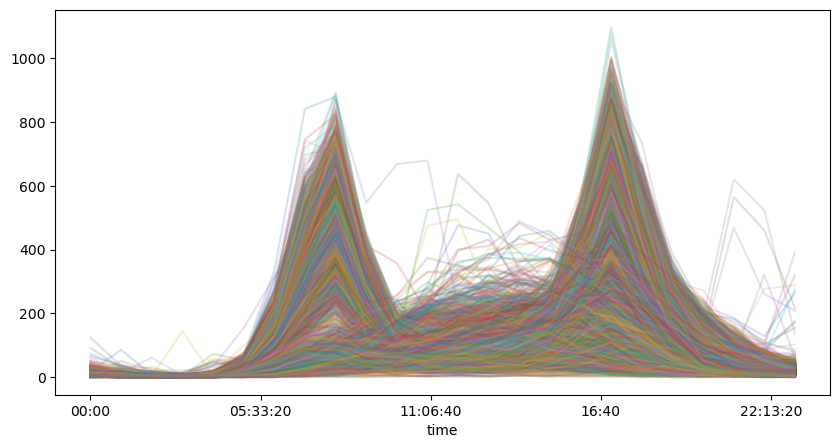

In [15]:
data_table.plot(legend=False, alpha=0.2, figsize=(10, 5))

In [20]:
# We will cluster days (we need days as "rows" of the df)
# We will use KMeans clustering
# Transpose the data_table to get days as rows

X = data_table.T

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='time'>

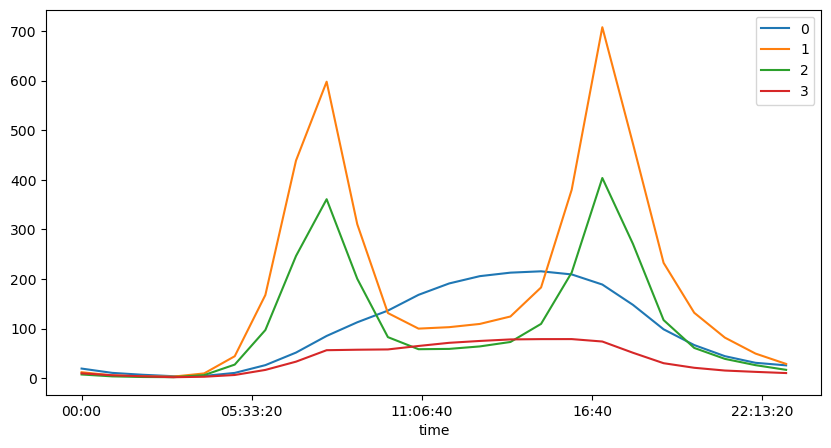

In [28]:
# Put cluster centers back into a dataframe
centers = pd.DataFrame(cluster_centers.T, index=data_table.index)
centers.plot(figsize=(10, 5))

#### Example 2: color quantization (color segmentation)
Earliest application of k-means clustering.

Simplify color representation of an image by reducing the number of colors in an image to a fixed number of colors (k).

In [ ]:
# load image
url = 'https://github.com/um-perez-alvaro/Data-Science-Practice/blob/307f66a63578bd2193a8ddd2260a360dc9ffeb02/Data/Tova_the_cat.png?raw=true'
from PIL import Image
import requests

img = np.array(Image.open(requests.get(url, stream=True).raw))
img

In [47]:
img.shape

(220, 294, 3)

In [51]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
X = img.reshape(img.shape[0]*img.shape[1],3)
pd.DataFrame(X)

,0,1,2
0,112,100,115
1,109,96,111
2,113,99,114
3,120,106,121
4,115,100,116
...,...,...,...
64675,91,80,93
64676,82,71,85
64677,85,74,88
64678,76,67,80


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


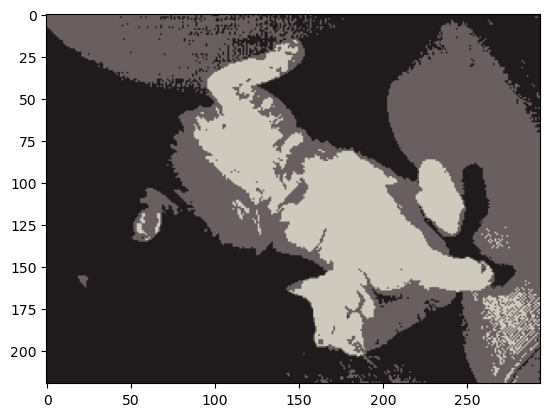

In [62]:
# cluster the pixel intensities
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# replace each pixel with the color of its nearest cluster center
X_compressed = cluster_centers[labels]
X_compressed

# reshape the image to have the same dimension as the original image
X_compressed = X_compressed.reshape(img.shape).astype('uint8')

# show the compressed image
plt.imshow(X_compressed)

### Example 3: topic modeling
the goal is to discover the "hidden" topics in a collection of documents

In [63]:
from sklearn.datasets import fetch_20newsgroups

In [69]:
categories = [
    'alt.atheism',
    'comp.windows.x',
    'rec.autos',
    'sci.space',
    'sci.electronics',
]

docs = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes')) # subset='all' means that we want to load all the data (train and test)
docs_df = pd.DataFrame({'text':docs.data, 'topic':docs.target})

In [70]:
docs_target_name_mapping = dict(enumerate(docs.target_names))
docs_target_name_mapping

{0: 'alt.atheism',
 1: 'comp.windows.x',
 2: 'rec.autos',
 3: 'sci.electronics',
 4: 'sci.space'}

In [71]:
docs_df

,text,topic
0,\n\nDid I claim that there was an absolute mor...,0
1,in article <735604750.28979.0@unix5.andrew.cm...,3
2,I am thinking about getting an Infiniti G20.\n...,2
3,: \n: >> Please enlighten me. How is omnipote...,0
4,"I know it's only wishful thinking, with our cu...",4
...,...,...
4743,"\nThey are real, and we still pay licence fees...",3
4744,I'd like to compile X11r5 on a Sony NWS-1750 r...,1
4745,\n\n\n\nThey do interpolate - it's not linear ...,3
4746,"\nI've always heard them referred to ""horizont...",2


In [74]:
# preprocess docs
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def process_pos(pos):
    if pos.startswith('J'): # adjectives
        return wordnet.ADJ
    elif pos.startswith('V'): # verbes
        return wordnet.VERB
    elif pos.startswith('N'): # nouns
        return wordnet.NOUN
    elif pos.startswith('R'): # adverbs
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
punctuation = [punc for punc in string.punctuation]

def process_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos=process_pos(pos)) 
                        for word,pos in nltk.pos_tag(words) 
                        if word not in stop_words # remove stop words
                        and word not in punctuation # remove punctuations
 ] 
    return ' '.join(lemmatized_words)

docs_df['text'] = docs_df['text'].apply(process_text)
docs_df

[nltk_data] Downloading package wordnet to /home/jake/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jake/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jake/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jake/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/jake/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,topic
0,claim absolute morality objective one,0
1,article 735604750.28979.0 unix5.andrew.cmu.edu...,3
2,think get infiniti g20 consumer report rank hi...,2
3,please enlighten omnipotence contradictory def...,0
4,know 's wishful thinking current president las...,4
...,...,...
4743,real still pay licence fee receive tv detector...,3
4744,'d like compile x11r5 sony nws-1750 run news 4...,1
4745,interpolate 's linear interpolation though cor...,3
4746,'ve always hear refer `` horizontally oppose '...,2


In [75]:
# word frequencies
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', ngram_range = (1,1),max_df=0.8, max_features=15000)

X = vect.fit_transform(docs_df.text)

In [76]:
k = 15
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
# clusters = topics?
cluster = 14
docs_df.loc[labels==cluster,'topic'].value_counts()

4    188
0      3
3      3
1      2
Name: topic, dtype: int64

In [81]:
# put word frequencies into a dataframe
words_df = pd.DataFrame(data = X.toarray(),columns=vect.get_feature_names_out())
words_df

,00,000,0000,00000,00000074,00041032,004418,0060,0065,007,...,zooming,zp,zpixmap,zq,zsh,zt,zw,zwarte,zx,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# top 10 words in each cluster 
for i in range(k):
    print('cluster '+str(i))
    print('---------------------------')
    print(words_df[labels==i].mean().sort_values(ascending=False).head(10).index.to_list())
    print('---------------------------')

cluster 0
---------------------------
['price', 'oil', 'dealer', 'water', 'cool', 'sell', 'use', 'like', 'printer', 'hp']
---------------------------
cluster 1
---------------------------
['people', 'think', 'say', 'detector', 'moral', 'right', 'radar', 'claim', 'morality', 'make']
---------------------------
cluster 2
---------------------------
['like', 'make', 'know', 'good', 'think', 'people', 'work', 'use', 'time', 'year']
---------------------------
cluster 3
---------------------------
['god', 'atheist', 'believe', 'belief', 'religion', 'atheism', 'say', 'faith', 'exist', 'people']
---------------------------
cluster 4
---------------------------
['use', 'chip', 'battery', 'circuit', 'output', 'voltage', 'lead', 'power', 'line', 'signal']
---------------------------
cluster 5
---------------------------
['car', 'engine', 'drive', 'new', 'buy', 'good', 'like', 'know', 'ford', 'speed']
---------------------------
cluster 6
---------------------------
['launch', 'orbit', 'mission',